In [1]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2 style='color:purple' align='center'> Build our first neural network in Keras for handwritten digit recognition problem</h2>

**We will use keras digit MNIST dataset. This consist of 6000 28X28 pixel images and 1000 test images, these images are classified in one of the 10 categories (0-9)**

In [1]:
# import the packages
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Load the data
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


Lets get some idea about the data

In [3]:
len(X_train)

60000

In [4]:
len(X_test)

10000

In [5]:
X_train[0].shape

(28, 28)

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

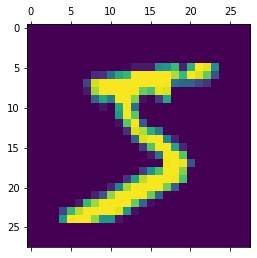

In [7]:
# Visualizing our input data 
plt.matshow(X_train[0]) 

In [8]:
y_train[0]

5

In [10]:
# Data Scaling
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# Flatten the 28*28 grid data into a 1-dimensional data

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

<h3 style='color:purple'>A simple neural network </h3> It comprises of 784 (28*28) neurons in the input layer and 10 (0-9) neuron in the output layer

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1880 - accuracy: 0.6090
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.9767 - accuracy: 0.7034
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.7901 - accuracy: 0.7408
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.6262 - accuracy: 0.7602
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 1.4835 - accuracy: 0.7757


In [16]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.4036 - accuracy: 0.8009


[1.4036331176757812, 0.8008999824523926]

In [17]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

array([0.3168553 , 0.4046806 , 0.35249814, 0.41050223, 0.47847775,
       0.38175577, 0.28840005, 0.80692065, 0.3720956 , 0.5824262 ],
      dtype=float32)

Lets check our test data and the corresponding prediction

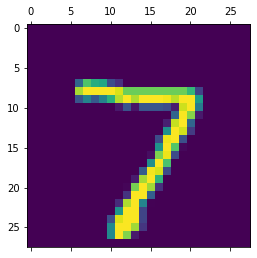

In [18]:
plt.matshow(X_test[0])

In [19]:
y_predicted[0] # This gives the value obatined from each neuron of the output layer

array([0.3168553 , 0.4046806 , 0.35249814, 0.41050223, 0.47847775,
       0.38175577, 0.28840005, 0.80692065, 0.3720956 , 0.5824262 ],
      dtype=float32)

[link text](https://)**np.argmax finds a maximum element  from an array and returns the index of it**

In [21]:
np.argmax(y_predicted[0]) # This gives the index of the output layer where the maximum value occurs

7

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

We will visualize our results in the form of a confusion matrix

---



In [25]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 925,    2,    5,   10,    0,    3,   29,    1,    5,    0],
       [   0, 1114,    8,    3,    0,    0,    4,    0,    6,    0],
       [  19,   93,  785,   27,   18,    0,   32,   22,   35,    1],
       [   6,   54,   27,  858,    1,    2,    5,   23,   24,   10],
       [   2,   52,    3,    0,  789,    0,   28,    9,    3,   96],
       [  37,  118,    4,  204,   34,  381,   27,   39,   22,   26],
       [  26,   49,    6,    0,   14,    9,  853,    0,    1,    0],
       [   2,   75,   12,    2,   10,    0,    2,  898,    6,   21],
       [  22,  103,   10,   96,   17,    7,   16,   25,  652,   26],
       [  23,   45,    5,   11,   73,    0,    1,   90,    7,  754]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

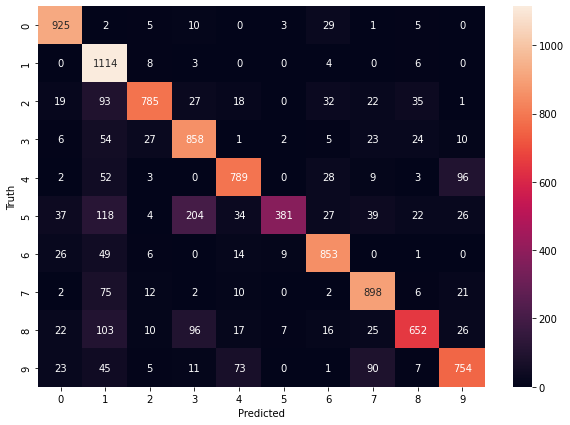

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer having 100 neurons</h3>

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2465 - accuracy: 0.7066
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5215 - accuracy: 0.8687
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4003 - accuracy: 0.8916
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3541 - accuracy: 0.9011
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3289 - accuracy: 0.9066


In [28]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3094 - accuracy: 0.9113


[0.3094123899936676, 0.911300003528595]

Thus by adding a hidden layer the accuracy of the neural network has increased from 92.51% to 97.53%

Text(69.0, 0.5, 'Truth')

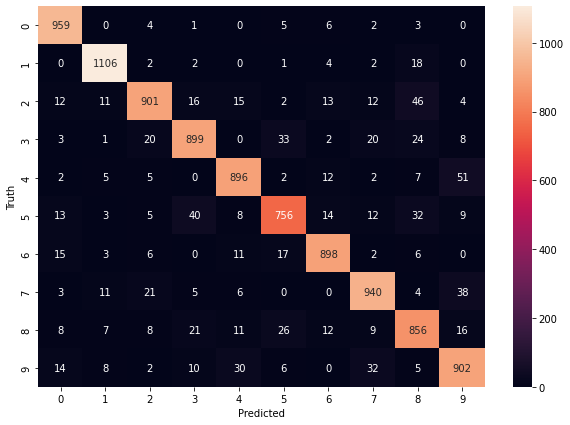

In [29]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 1.2444 - accuracy: 0.7060
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5180 - accuracy: 0.8698
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4013 - accuracy: 0.8911
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3561 - accuracy: 0.9011
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3295 - accuracy: 0.9067


In [31]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3095 - accuracy: 0.9092


[0.3094898462295532, 0.9092000126838684]

Text(69.0, 0.5, 'Truth')

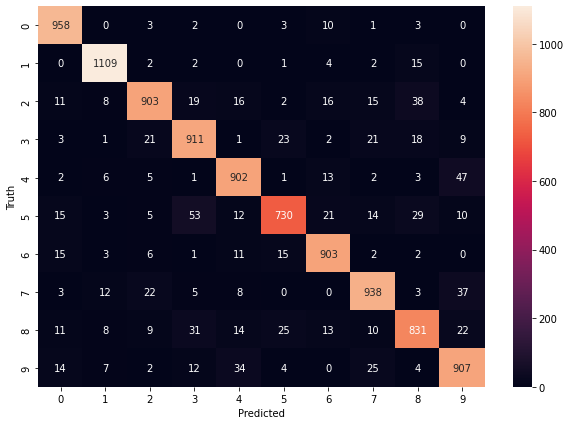

In [32]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h2 style='color:purple' align='center'>Build a neural network in Keras for image classification problem using Fashion MNIST Dataset</h2>

**We will use keras fashion MNIST dataset. This consist of 60000 28X28 pixel images and 10000 test images, these images are classified in one of the 10 categories**

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot




In [33]:
fm = tf.keras.datasets.fashion_mnist
(trainX, trainy), (testX, testy) = fm.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [34]:
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


In [35]:
trainX[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [36]:
trainy[0]

9

In [37]:
from matplotlib import pyplot

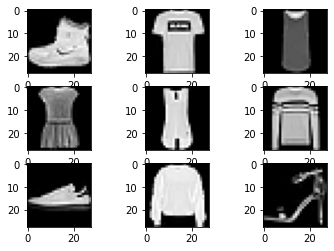

In [38]:
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

<h3 style='color:purple'>Now build the Sequential Model and add layers into it</h3>

In [39]:
 from keras.models import Sequential
 from keras.layers import Flatten, Dense, Activation

model = Sequential()
model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(100, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [40]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [41]:
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [42]:
model.fit(trainX, trainy, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 3.3630 - accuracy: 0.6876
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7224 - accuracy: 0.7268
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6189 - accuracy: 0.7637
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5904 - accuracy: 0.7806
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5752 - accuracy: 0.7887
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5509 - accuracy: 0.8024
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5317 - accuracy: 0.8123
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5254 - accuracy: 0.8160
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5156 - accuracy: 0.8204
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.507

In [43]:
model.evaluate(testX, testy)

313/313 [==============================] - 1s 2ms/step - loss: 0.6092 - accuracy: 0.8061


[0.6091957092285156, 0.8061000108718872]

**Above shows accuracy score of 81.31%. The first parameter is loss**

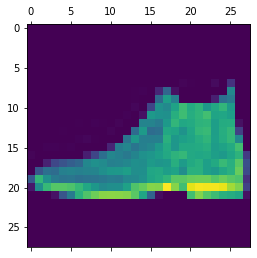

In [44]:
plt.matshow(testX[0])

In [48]:
yp = model.predict(testX)

In [46]:
yp_labels = [np.argmax(i) for i in yp]

In [47]:
np.argmax(yp[0])

9

In [49]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

In [50]:
class_labels[np.argmax(yp[0])]

'Ankle boot'

Text(69.0, 0.5, 'Truth')

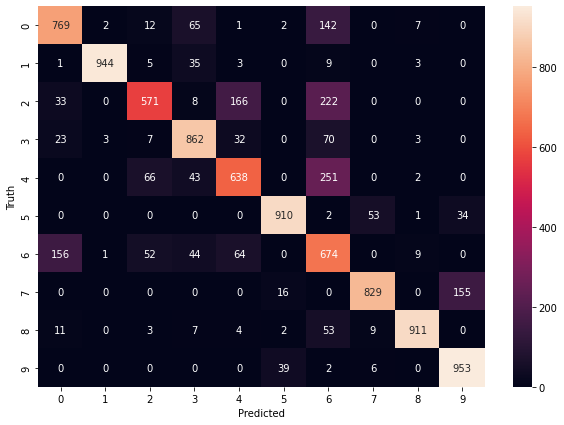

In [51]:
cm = tf.math.confusion_matrix(labels=testy,predictions=yp_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Visualizing the Neural Netwrok Model

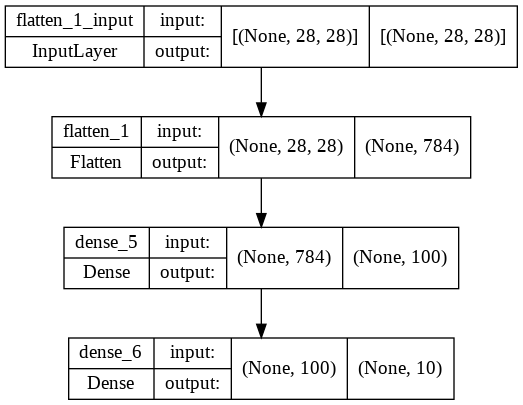

In [52]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)